### Importing libraries

In [ ]:
import requests
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn import svm
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

In [ ]:
pd.set_option('display.max_columns', None)

### Data Loading

In [ ]:
!gdown 198ID9EhCRxtWb3J92GW-Fin412sUhi66

Downloading...
From: https://drive.google.com/uc?id=198ID9EhCRxtWb3J92GW-Fin412sUhi66
To: /content/data.csv
100% 50.7k/50.7k [00:00<00:00, 53.0MB/s]


In [ ]:
df_houseprice = pd.read_csv('/content/data.csv')

In [ ]:
df_houseprice.head(5)

,No.,Listing,Bedroom,Bathroom,Garage,Carport,Kitchen,Dining Room,Living Room,Maid's Room,Maid's Bathrrom,Bulding Area(m^2),Land Area(m^2),Furnished,Condition,Year Built,Price(millions Rp)
0,1,"Rumah Indent Dlm Gang Lt 22 M2 di Johar Baru ,...",2.0,2,0,0,1,0,1,0,0.0,28,28,No,New,2023.0,350.0
1,2,Rumah Kartini Siap Huni 2 Lantai Harga Masuk Akal,2.0,1,0,0,0,0,0,0,0.0,27,54,No,Old,2018.0,300.0
2,3,Kembali Hadir Rumah Indent 1 Lantai Teristimew...,2.0,1,0,1,1,1,1,0,0.0,40,60,No,New,2024.0,360.0
3,4,Rumah mewah 2 lantai Kemayoran SHM IMB,2.0,2,0,0,1,1,1,1,1.0,48,24,Semi,New,2024.0,350.0
4,5,"Rumah di Sukahati Cibinong,cuma 5 Menit Dari P...",2.0,1,1,1,1,0,1,0,0.0,50,60,No,New,2024.0,352.0


# Exploratory Data Analysis

## Assessing Data

In [ ]:
df_houseprice = df_houseprice.drop(columns=['No.', 'Listing'])

In [ ]:
df_houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bedroom             503 non-null    float64
 1   Bathroom            504 non-null    int64  
 2   Garage              504 non-null    int64  
 3   Carport             504 non-null    int64  
 4   Kitchen             504 non-null    int64  
 5   Dining Room         504 non-null    int64  
 6   Living Room         504 non-null    int64  
 7   Maid's Room         504 non-null    int64  
 8   Maid's Bathrrom     503 non-null    float64
 9   Bulding Area(m^2)   504 non-null    int64  
 10  Land Area(m^2)      504 non-null    int64  
 11  Furnished           502 non-null    object 
 12  Condition           504 non-null    object 
 13  Year Built          482 non-null    float64
 14  Price(millions Rp)  503 non-null    float64
dtypes: float64(4), int64(9), object(2)
memory usage: 59.2+ KB

In [ ]:
df_houseprice.describe()

,Bedroom,Bathroom,Garage,Carport,Kitchen,Dining Room,Living Room,Maid's Room,Maid's Bathrrom,Bulding Area(m^2),Land Area(m^2),Year Built,Price(millions Rp)
count,503.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,503.000000,504.000000,504.000000,482.000000,503.000000
mean,4.854871,3.825397,1.319444,1.692460,1.061508,0.795635,0.817460,0.771825,0.596421,368.974206,384.367063,2008.597510,25405.801193
std,4.102377,3.861065,1.518324,2.087229,0.391493,0.403638,0.386672,0.923258,0.687210,363.943124,443.672539,21.027648,68874.367837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,17.000000,1680.000000,200.000000
25%,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,115.750000,100.000000,2000.000000,1925.000000
50%,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,280.000000,257.000000,2012.000000,5750.000000
75%,5.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,500.000000,513.250000,2022.000000,18000.000000
max,40.000000,40.000000,15.000000,20.000000,3.000000,1.000000,1.000000,7.000000,5.000000,3465.000000,3465.000000,2025.000000,1000000.000000


## Data Cleaning

### 1. Duplicated Data

In [ ]:
print(f"Duplicates: {df_houseprice.duplicated().sum()}")

Duplicates: 44


In [ ]:
df_houseprice[df_houseprice.duplicated() == True]

,Bedroom,Bathroom,Garage,Carport,Kitchen,Dining Room,Living Room,Maid's Room,Maid's Bathrrom,Bulding Area(m^2),Land Area(m^2),Furnished,Condition,Year Built,Price(millions Rp)
223,4.0,2,0,0,0,0,0,0,0.0,96,32,No,Old,1980.0,550.0
366,2.0,2,0,0,1,1,1,0,0.0,40,20,No,New,2024.0,360.0
411,7.0,6,2,1,1,1,1,1,1.0,390,285,Semi,Old,2003.0,6600.0
416,7.0,6,2,1,1,1,1,1,1.0,390,285,Semi,Old,2003.0,6600.0
464,4.0,2,1,1,1,1,1,0,0.0,240,260,Semi,New,2021.0,2200.0
465,5.0,3,2,1,1,1,1,0,0.0,380,500,Yes,Old,1998.0,5500.0
466,3.0,2,1,0,1,1,1,0,0.0,180,190,No,New,2023.0,1300.0
467,4.0,3,2,1,1,1,1,1,1.0,320,400,Yes,Old,1994.0,4800.0
468,2.0,1,0,1,1,1,0,0,0.0,130,110,No,New,2024.0,400.0
469,6.0,4,2,2,1,1,1,1,1.0,520,680,Yes,Old,1997.0,7200.0


In [ ]:
df_houseprice.drop_duplicates(inplace=True)

In [ ]:
print(f"Duplicates: {df_houseprice.duplicated().sum()}")

Duplicates: 0


### 2. Missing Values

In [ ]:
df_houseprice.isna().sum()

Bedroom                1
Bathroom               0
Garage                 0
Carport                0
Kitchen                0
Dining Room            0
Living Room            0
Maid's Room            0
Maid's Bathrrom        1
Bulding Area(m^2)      0
Land Area(m^2)         0
Furnished              2
Condition              0
Year Built            22
Price(millions Rp)     1
dtype: int64

In [ ]:
df_houseprice.dropna(inplace=True)

In [ ]:
df_houseprice.isna().sum()

Bedroom               0
Bathroom              0
Garage                0
Carport               0
Kitchen               0
Dining Room           0
Living Room           0
Maid's Room           0
Maid's Bathrrom       0
Bulding Area(m^2)     0
Land Area(m^2)        0
Furnished             0
Condition             0
Year Built            0
Price(millions Rp)    0
dtype: int64

### 3. Adjusting Datatypes

In [ ]:
df_houseprice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 0 to 463
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bedroom             433 non-null    float64
 1   Bathroom            433 non-null    int64  
 2   Garage              433 non-null    int64  
 3   Carport             433 non-null    int64  
 4   Kitchen             433 non-null    int64  
 5   Dining Room         433 non-null    int64  
 6   Living Room         433 non-null    int64  
 7   Maid's Room         433 non-null    int64  
 8   Maid's Bathrrom     433 non-null    float64
 9   Bulding Area(m^2)   433 non-null    int64  
 10  Land Area(m^2)      433 non-null    int64  
 11  Furnished           433 non-null    object 
 12  Condition           433 non-null    object 
 13  Year Built          433 non-null    float64
 14  Price(millions Rp)  433 non-null    float64
dtypes: float64(4), int64(9), object(2)
memory usage: 54.1+ KB


In [ ]:
cols = df_houseprice.select_dtypes(include=['float64', 'int64']).columns
cols = cols.drop('Price(millions Rp)')

df_houseprice[cols] = df_houseprice[cols].astype('int32')

In [ ]:
df_houseprice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 0 to 463
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bedroom             433 non-null    int32  
 1   Bathroom            433 non-null    int32  
 2   Garage              433 non-null    int32  
 3   Carport             433 non-null    int32  
 4   Kitchen             433 non-null    int32  
 5   Dining Room         433 non-null    int32  
 6   Living Room         433 non-null    int32  
 7   Maid's Room         433 non-null    int32  
 8   Maid's Bathrrom     433 non-null    int32  
 9   Bulding Area(m^2)   433 non-null    int32  
 10  Land Area(m^2)      433 non-null    int32  
 11  Furnished           433 non-null    object 
 12  Condition           433 non-null    object 
 13  Year Built          433 non-null    int32  
 14  Price(millions Rp)  433 non-null    float64
dtypes: float64(1), int32(12), object(2)
memory usage: 33.8+ KB


### 4. Removing Outliers

Percentile Method

In [ ]:
df_houseprice.shape

(433, 15)

In [ ]:
lower_limit_col1 = df_houseprice['Price(millions Rp)'].quantile(0.001)
upper_limit_col1 = df_houseprice['Price(millions Rp)'].quantile(0.999)

lower_limit_col2 = df_houseprice['Year Built'].quantile(0.001)
upper_limit_col2 = df_houseprice['Year Built'].quantile(0.999)

df_houseprice = df_houseprice[(df_houseprice['Price(millions Rp)'] > lower_limit_col1) & (df_houseprice['Price(millions Rp)'] < upper_limit_col1) &
              (df_houseprice['Year Built'] > lower_limit_col2) & (df_houseprice['Year Built'] < upper_limit_col2)]

In [ ]:
df_houseprice.shape

(430, 15)

## Univariate Analysis

In [ ]:
df_eda = df_houseprice.copy()

In [ ]:
df_eda['Furnished'] = df_eda['Furnished'].replace({'No': 0, 'Yes': 1, 'Semi': 2})

df_eda['Condition'] = df_eda['Condition'].replace({'Old': 0, 'New': 1, 'Need Renov': 2})

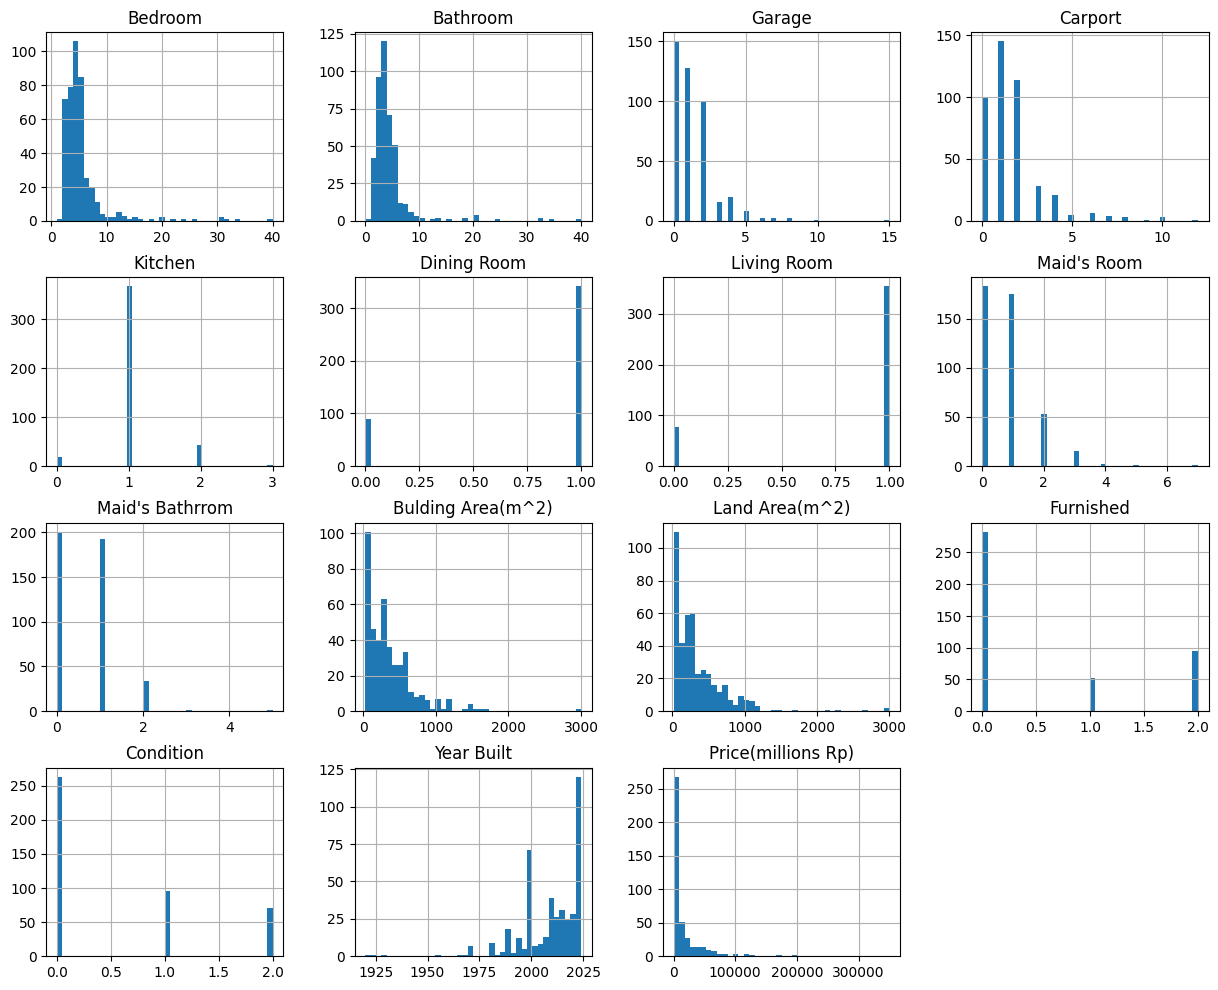

In [ ]:
df_eda.hist(bins=40, figsize=(15,12))
plt.show()

## Multivariate Analysis

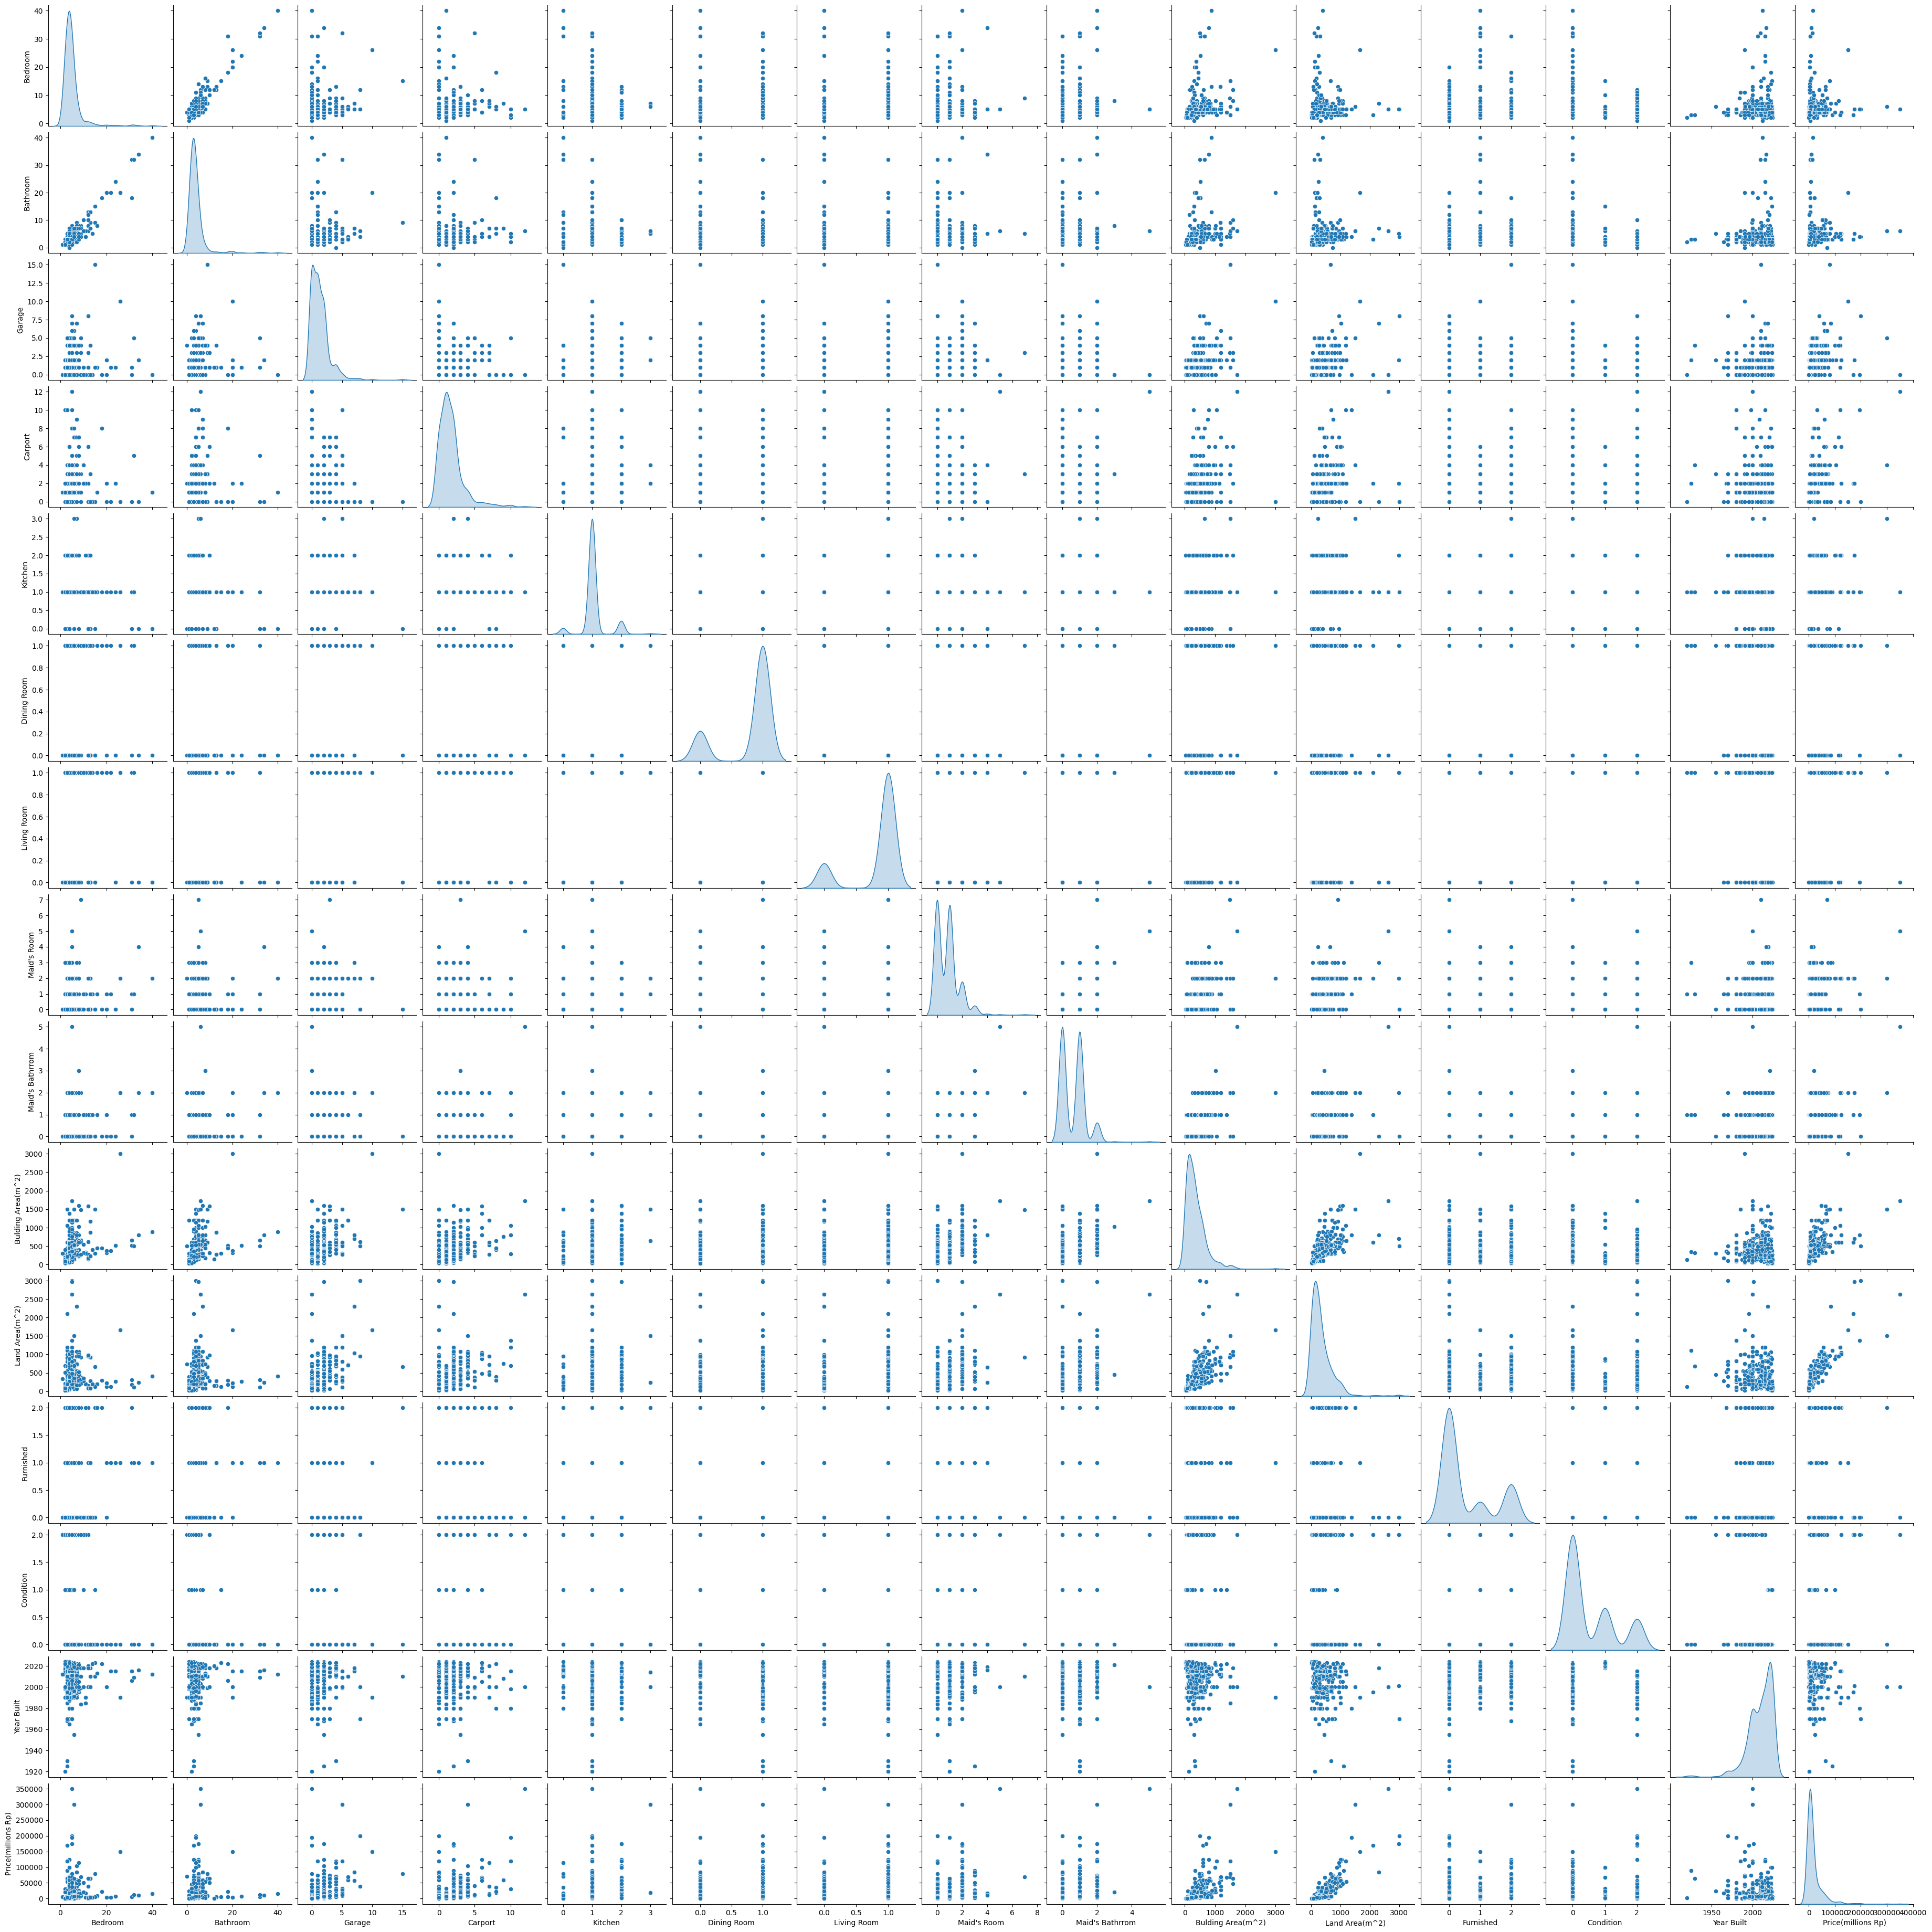

In [ ]:
# sns.pairplot(df_eda, diag_kind = 'kde')

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_eda.corr(numeric_only=True).round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20);

# Data Preparation

### One Hot Encode Categorical Data

In [ ]:
df_houseprice = pd.concat([df_houseprice, pd.get_dummies(df_houseprice['Furnished'], prefix='Furnished')],axis=1)
df_houseprice = pd.concat([df_houseprice, pd.get_dummies(df_houseprice['Condition'], prefix='Condition')],axis=1)

In [ ]:
df_houseprice.drop(['Furnished','Condition'], axis=1, inplace=True)

In [ ]:
df_houseprice.head(5)

,Bedroom,Bathroom,Garage,Carport,Kitchen,Dining Room,Living Room,Maid's Room,Maid's Bathrrom,Bulding Area(m^2),Land Area(m^2),Year Built,Price(millions Rp),Furnished_No,Furnished_Semi,Furnished_Yes,Condition_Need Renov,Condition_New,Condition_Old
0,2,2,0,0,1,0,1,0,0,28,28,2023,350.0,True,False,False,False,True,False
1,2,1,0,0,0,0,0,0,0,27,54,2018,300.0,True,False,False,False,False,True
2,2,1,0,1,1,1,1,0,0,40,60,2024,360.0,True,False,False,False,True,False
3,2,2,0,0,1,1,1,1,1,48,24,2024,350.0,False,True,False,False,True,False
4,2,1,1,1,1,0,1,0,0,50,60,2024,352.0,True,False,False,False,True,False


### Data Splitting

In [ ]:
X = df_houseprice.drop(["Price(millions Rp)"],axis =1)
y = df_houseprice["Price(millions Rp)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 430
Total # of sample in train dataset: 301
Total # of sample in test dataset: 129


## Data Normalization

In [ ]:
numerical_features = df_houseprice.select_dtypes(include='int32').columns.to_list()
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

In [ ]:
X_train[numerical_features].head()

,Bedroom,Bathroom,Garage,Carport,Kitchen,Dining Room,Living Room,Maid's Room,Maid's Bathrrom,Bulding Area(m^2),Land Area(m^2),Year Built
228,-0.198005,0.044595,0.507718,0.769500,-0.151458,-2.091650,-2.214037,1.519993,2.228308,0.898318,0.512468,0.160790
273,0.070461,0.318535,1.830862,1.342816,-0.151458,0.478091,0.451664,2.720826,2.228308,2.944432,1.144288,0.160790
307,-0.466471,-0.503285,-0.815426,0.196184,-0.151458,0.478091,0.451664,-0.881675,-0.891323,-0.465757,-0.343815,0.920245
180,-0.198005,-0.229345,0.507718,0.196184,-0.151458,0.478091,0.451664,0.319159,-0.891323,-0.124738,-0.177546,0.160790
304,-0.198005,0.044595,-0.153854,-0.377131,-0.151458,0.478091,0.451664,0.319159,0.668492,-0.114508,-0.512854,0.851203


In [ ]:
X_train[numerical_features].describe().round(4)

,Bedroom,Bathroom,Garage,Carport,Kitchen,Dining Room,Living Room,Maid's Room,Maid's Bathrrom,Bulding Area(m^2),Land Area(m^2),Year Built
count,301.0000,301.0000,301.0000,301.0000,301.0000,301.0000,301.0000,301.0000,301.0000,301.0000,301.0000,301.0000
mean,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017,1.0017
min,-1.0034,-0.7772,-0.8154,-0.9504,-2.6842,-2.0917,-2.2140,-0.8817,-0.8913,-1.0557,-0.8648,-6.1910
25%,-0.4665,-0.5033,-0.8154,-0.3771,-0.1515,0.4781,0.4517,-0.8817,-0.8913,-0.8068,-0.7013,-0.6677
50%,-0.1980,-0.2293,-0.1539,-0.3771,-0.1515,0.4781,0.4517,0.3192,-0.8913,-0.2748,-0.2856,0.1608
75%,0.0705,0.0446,0.5077,0.1962,-0.1515,0.4781,0.4517,0.3192,0.6685,0.5573,0.3240,0.8512
max,7.8560,8.2628,9.1082,4.7827,4.9140,0.4781,0.4517,3.9217,2.2283,4.3085,7.3904,0.9893


# Model Developoment

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['LR', 'RandomForest', 'SVM'])

## Linear Regression

In [ ]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

models.loc['train_mse','LR'] = mean_squared_error(y_pred=model_LR.predict(X_train), y_true=y_train)

## Random Forest

In [ ]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## Support Vector Machine

In [ ]:
model_SVR = svm.SVR()
model_SVR.fit(X_train, y_train)

models.loc['train_mse','SVM'] = mean_squared_error(y_pred=model_SVR.predict(X_train), y_true=y_train)

# Model Evaluation

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['LR', 'RF', 'SVM'])

model_dict = {'LR': model_LR, 'RF': RF, 'SVM': model_SVR}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
LR,304910.316868,17206681.148541
RF,49327.774019,2190603.913046
SVM,1219037.434525,1994335.584437


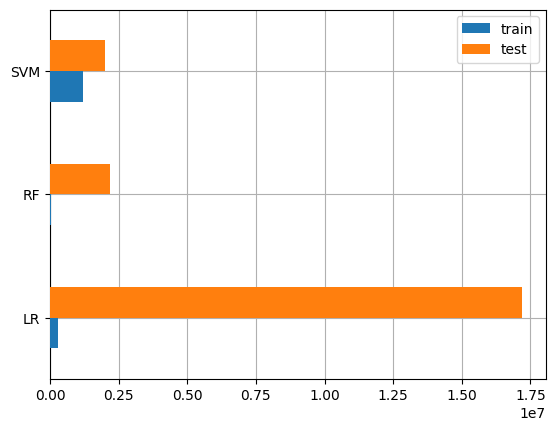

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[5:6].copy()
pred_dict = {'y_true':y_test[5:6]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pred = pd.DataFrame(pred_dict)

print(X_test.iloc[5:6])
print(pred)

,y_true,prediksi_LR,prediksi_RF,prediksi_SVM
275,5000.0,135138.0,1014.4,5797.1


In [ ]:
Bedroom = 2 # @param {type:"integer"}
Bathroom = 2 # @param {type:"integer"}
Garage = 1 # @param {type:"integer"}
Carport = 0 # @param {type:"integer"}
Kitchen = 1 # @param {type:"integer"}
Dining = 0 # @param {type:"integer"}
Living = 1 # @param {type:"integer"}
Maids_Room = 0 # @param {type:"integer"}
Maids_Bathroom = 0 # @param {type:"integer"}
Building_Area = 40 # @param {type:"integer"}
Land_Area = 65 # @param {type:"integer"}
Year_Built =	2010 # @param {type:"integer"}
Furnished = 'Yes' # @param ["No", "Yes", "Semi"] {allow-input: true}
Condition = 'Old' # @param ["New", "Old", "Need Renov"] {allow-input: true}

if Furnished == 'No':
  Furnished_No = True
  Furnished_Semi = False
  Furnished_Yes = False
elif Furnished == 'Semi':
  Furnished_No = False
  Furnished_Semi = True
  Furnished_Yes = False
elif Furnished == 'Yes':
  Furnished_No = False
  Furnished_Semi = False
  Furnished_Yes = True

if Condition == 'New':
  Condition_Need_R = False
  Condition_New = True
  Condition_Old = False
if Condition == 'Need Renov':
  Condition_Need_R = True
  Condition_New = False
  Condition_Old = False
if Condition == 'Old':
  Condition_Need_R = False
  Condition_New = False
  Condition_Old = True

data = {
    "Bedroom": [Bedroom],
    "Bathroom": [Bathroom],
    "Garage": [Garage],
    "Carport": [Carport],
    "Kitchen": [Kitchen],
    "Dining Room": [Dining],
    "Living Room": [Living],
    "Maid's Room": [Maids_Room],
    "Maid's Bathrrom": [Maids_Bathroom],
    "Bulding Area(m^2)": [Building_Area],
    "Land Area(m^2)": [Land_Area],
    "Year Built": [Year_Built],
    "Furnished_No": [Furnished_No],
    "Furnished_Semi": [Furnished_Semi],
    "Furnished_Yes": [Furnished_Yes],
    "Condition_Need Renov": [Condition_Need_R],
    "Condition_New": [Condition_New],
    "Condition_Old": [Condition_Old]
}

df_input = pd.DataFrame(data)

df_input[numerical_features] = scaler.transform(df_input.loc[:, numerical_features])

pred_dict = pd.DataFrame()
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(df_input).round(1)

pd.DataFrame(pred_dict)

,prediksi_LR,prediksi_RF,prediksi_SVM
0,-7628.6,539.4,5765.6
